In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.io as sio
from xmitgcm import open_mdsdataset
import pandas as pd
import xarray as xr
from copy import deepcopy
import time
import gsw

In [2]:
plt.rcParams.update({'font.size': 14
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 14,
      'legend.fontsize' : 12,'legend.handlelength': 2})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

In [3]:
flux1 = np.load('/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/flux1_unoverlap.npy')[1:, :]
flux2 = np.load('/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/flux2_unoverlap.npy')[1:, :]

24
1187


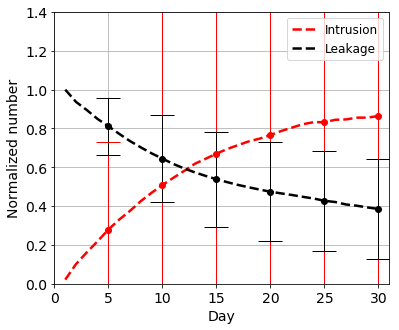

In [5]:
flux1_new = deepcopy(flux1)
flux2_new = deepcopy(flux2)


for i in np.arange(flux1_new.shape[0]):

    if flux1[i, 3] == 0:
        flux1_new[i, 3:] = np.nan
    else:
        flux1_new[i, 3:] = flux1_new[i, 3:] / flux1[i, 3]
        flux2_new[i, 3:] = flux2_new[i, 3:] / flux1[i, 3]

# check flux2_new
for i in np.arange(flux1_new.shape[0]):
    if flux2_new[i, 5] > 10:
        print(i)
        flux2_new[i, :] = np.nan

flux1_mean = np.nanmean(flux1[:, 3:], 0) / np.nanmean(flux1[:, 3], 0)


flux2_mean = np.nanmean(flux2[:, 3:], 0) / np.nanmean(flux1[:, 3], 0)


tt = np.arange(30) + 1

# -----------------------------

flux1_mean_err = np.zeros((3, 6))
flux2_mean_err = np.zeros((3, 6))

dnum = 0
for day in np.arange(5, 31, 5):
    flux1_mean_err[0, dnum] = tt[day-1]
    flux1_mean_err[1, dnum] = flux1_mean[day-1]
    flux1_mean_err[2, dnum] = np.nanstd(flux1_new[:, day+2])
    flux2_mean_err[0, dnum] = tt[day-1]
    flux2_mean_err[1, dnum] = flux2_mean[day-1]
    flux2_mean_err[2, dnum] = np.nanstd(flux2_new[:, day+2])

    dnum = dnum + 1

fig = plt.figure(figsize=(6, 5))


hl2 = plt.plot(np.arange(1, 31, 1), flux2_mean,
               color='r', linestyle='--', linewidth=2.5, label='Intrusion')

hl1 = plt.plot(np.arange(1, 31, 1), flux1_mean,
               'k', linestyle='--', linewidth=2.5, label='Leakage')


plt.errorbar(flux2_mean_err[0, :], flux2_mean_err[1, :],
             flux2_mean_err[2, :], fmt='o', color='r', linewidth=1, capsize=12)

plt.errorbar(flux1_mean_err[0, :], flux1_mean_err[1, :],
             yerr=flux1_mean_err[2, :], fmt='o', color='k', linewidth=1, capsize=12)

plt.legend(loc=1)
plt.grid()
plt.xticks(ticks=np.arange(0, 31, 5))
plt.xlim(0, 31)
plt.xlabel('Day')
plt.ylabel('Normalized number')
plt.ylim(0, 1.4)
#plt.title('Comparison')

plt.savefig('Figure_12.png', dpi=300, bbox_inches='tight')

In [7]:
df_fix = pd.read_pickle('/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/df_flux_fix.pkl')
df_moving = pd.read_pickle('/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/df_flux_moving.pkl')

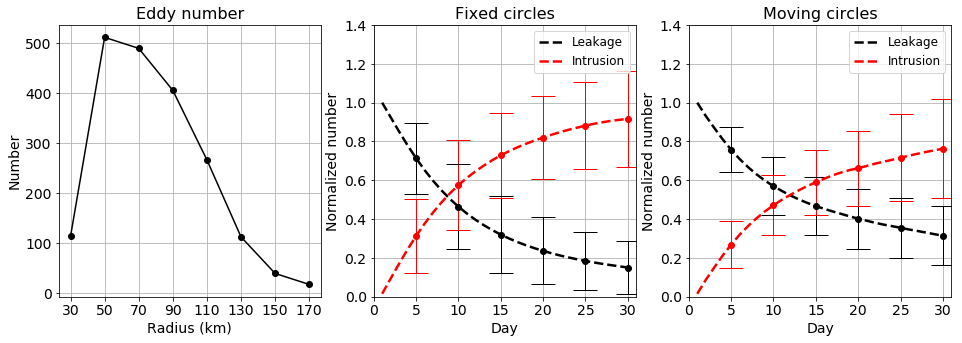

In [8]:
flux1_fix = np.zeros((df_fix.shape[0], 30))
flux1_fix_new = np.zeros((df_fix.shape[0], 30))

flux2_fix = np.zeros((df_fix.shape[0], 30))
flux2_fix_new = np.zeros((df_fix.shape[0], 30))

flux1_moving = np.zeros((df_moving.shape[0], 30))
flux1_moving_new = np.zeros((df_moving.shape[0], 30))

flux2_moving = np.zeros((df_moving.shape[0], 30))
flux2_moving_new = np.zeros((df_moving.shape[0], 30))

for i in np.arange(df_fix.shape[0]):
    
    flux1_fix[i, :] = df_fix.flux1.iloc[i]
    flux1_fix_new[i, :] = df_fix.flux1.iloc[i] / df_fix.flux1.iloc[i][0]

    flux2_fix[i, :] = df_fix.flux2.iloc[i]
    flux2_fix_new[i, :] = df_fix.flux2.iloc[i] / df_fix.flux1.iloc[i][0]
    
    flux1_moving[i, :] = df_moving.flux1.iloc[i]
    flux1_moving_new[i, :] = df_moving.flux1.iloc[i] / df_moving.flux1.iloc[i][0]

    flux2_moving[i, :] = df_moving.flux2.iloc[i]
    flux2_moving_new[i, :] = df_moving.flux2.iloc[i] / df_moving.flux1.iloc[i][0]
    
flux1_fix_mean = np.nanmean(flux1_fix, 0) / np.nanmean(flux1_fix[:, 0], 0)
flux2_fix_mean = np.nanmean(flux2_fix, 0) / np.nanmean(flux1_fix[:, 0], 0)

flux1_moving_mean = np.nanmean(flux1_moving, 0) / np.nanmean(flux1_moving[:, 0], 0)
flux2_moving_mean = np.nanmean(flux2_moving, 0) / np.nanmean(flux1_moving[:, 0], 0)

flux1_fix_mean_err = np.zeros((3, 6))
flux2_fix_mean_err = np.zeros((3, 6))

flux1_moving_mean_err = np.zeros((3, 6))
flux2_moving_mean_err = np.zeros((3, 6))

tt = np.arange(30) + 1

dnum = 0
for day in np.arange(5, 31, 5):
    flux1_fix_mean_err[0, dnum] = tt[day-1]
    flux1_fix_mean_err[1, dnum] = flux1_fix_mean[day-1]
    flux1_fix_mean_err[2, dnum] = np.std(flux1_fix_new[:, day-1])
    
    flux2_fix_mean_err[0, dnum] = tt[day-1]
    flux2_fix_mean_err[1, dnum] = flux2_fix_mean[day-1]
    flux2_fix_mean_err[2, dnum] = np.std(flux2_fix_new[:, day-1])
    
    flux1_moving_mean_err[0, dnum] = tt[day-1]
    flux1_moving_mean_err[1, dnum] = flux1_moving_mean[day-1]
    flux1_moving_mean_err[2, dnum] = np.std(flux1_moving_new[:, day-1])

    flux2_moving_mean_err[0, dnum] = tt[day-1]
    flux2_moving_mean_err[1, dnum] = flux2_moving_mean[day-1]
    flux2_moving_mean_err[2, dnum] = np.std(flux2_moving_new[:, day-1])
    
    dnum = dnum + 1
    

    
fig = plt.figure(figsize=(16, 5))

plt.subplot(131)

datarad = np.histogram(df_fix.L, bins=np.arange(20, 210, 20))
plt.plot(np.arange(30, 190, 20), datarad[0][:-1], 'o-', color='k')
plt.xticks(ticks=np.arange(30, 180, 20))
plt.grid()
plt.xlabel('Radius (km)')
plt.ylabel('Number')
plt.title('Eddy number')


plt.subplot(132)

hl1 = plt.plot(np.arange(1, 31, 1), flux1_fix_mean,
               'k', linestyle='--', linewidth=2.5, label='Leakage')


plt.errorbar(flux1_fix_mean_err[0, :], flux1_fix_mean_err[1, :],
             yerr=flux1_fix_mean_err[2, :], fmt='o', color='k', linewidth=1, capsize=12)

hl1 = plt.plot(np.arange(1, 31, 1), flux2_fix_mean,
               'r', linestyle='--', linewidth=2.5, label='Intrusion')

plt.errorbar(flux2_fix_mean_err[0, :], flux2_fix_mean_err[1, :],
             yerr=flux2_fix_mean_err[2, :], fmt='o', color='r', linewidth=1, capsize=12)
#plt.subplot(122)

#hl1 = plt.plot(np.arange(1, 31, 1), flux1_moving_mean,
#               'r', linestyle='--', linewidth=2.5, label='Moving circles')


#plt.errorbar(flux1_moving_mean_err[0, :], flux1_moving_mean_err[1, :],
#             yerr=flux1_moving_mean_err[2, :], fmt='o', color='r', linewidth=1, capsize=12)

plt.legend(loc=1)
plt.grid()
plt.xticks(ticks=np.arange(0, 31, 5))
plt.xlim(0, 31)
plt.xlabel('Day')
plt.ylabel('Normalized number')
plt.ylim(0, 1.4)
plt.title('Fixed circles')
#plt.savefig('Figure_13.png', dpi=200, bbox_inches='tight')

plt.subplot(133)

hl1 = plt.plot(np.arange(1, 31, 1), flux1_moving_mean,
               'k', linestyle='--', linewidth=2.5, label='Leakage')


plt.errorbar(flux1_moving_mean_err[0, :], flux1_moving_mean_err[1, :],
             yerr=flux1_moving_mean_err[2, :], fmt='o', color='k', linewidth=1, capsize=12)

hl1 = plt.plot(np.arange(1, 31, 1), flux2_moving_mean,
               'r', linestyle='--', linewidth=2.5, label='Intrusion')

plt.errorbar(flux2_moving_mean_err[0, :], flux2_moving_mean_err[1, :],
             yerr=flux2_moving_mean_err[2, :], fmt='o', color='r', linewidth=1, capsize=12)

plt.legend(loc=1)
plt.grid()
plt.xticks(ticks=np.arange(0, 31, 5))
plt.xlim(0, 31)
plt.xlabel('Day')
plt.ylabel('Normalized number')
plt.ylim(0, 1.4)
plt.title('Moving circles')

plt.savefig('Figure_13.png', dpi=300, bbox_inches='tight')